# SMS Spam Classification

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords

sns.set_style('whitegrid')
%matplotlib inline

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\haris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## The Data

**Read the SMSSpamCollections file and set it as a dataframe called sms.**

In [3]:
sms = pd.read_csv('SMSSpamCollections', sep='\t', names=['label', 'text'])

** Check the head, info , and describe methods on sms.**

In [4]:
sms.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
sms.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


**Create a new column called "text length" which is the number of words in the text column.**

In [7]:
sms['text length'] = sms['text'].apply(len)

<AxesSubplot:ylabel='Frequency'>

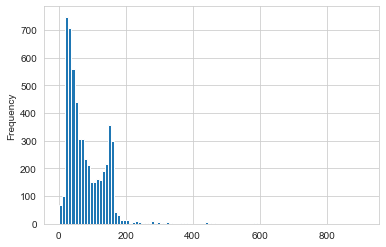

In [8]:
sms['text length'].plot(bins=100, kind='hist') 

In [9]:
sms['text length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: text length, dtype: float64

### Define a text processing function to remove unnecessary words

In [10]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [11]:
sms['text'] = sms['text'].apply(text_process)

In [12]:
sms.head()

,label,text,text length
0,ham,Go jurong point crazy Available bugis n great ...,111
1,ham,Ok lar Joking wif u oni,29
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...,155
3,ham,U dun say early hor U c already say,49
4,ham,Nah dont think goes usf lives around though,61


## NLP Classification Task

**Create two objects X and y. X will be the 'text' column of sms and y will be the 'label' column of sms. (Your features and target/labels)**

In [13]:
X = sms['text'].copy()
y = sms['label'].copy()

**Import CountVectorizer and create a CountVectorizer object.**

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer().fit(X)

** Use the fit_transform method on the CountVectorizer object and pass in X (the 'text' column). Save this result by overwriting X.**

In [15]:
X = cv.transform(X)

## Train Test Split

Let's split our data into training and testing data.

** Use train_test_split to split up the data into X_train, X_test, y_train, y_test. Use test_size=0.3 and random_state=101 **

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training a Model

Time to train a model!

** Import MultinomialNB and create an instance of the estimator and call is nb **

In [18]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

**Now fit nb using the training data.**

In [19]:
nb.fit(X_train, y_train)

MultinomialNB()

## Predictions and Evaluations

Time to see how our model did!

**Use the predict method off of nb to predict labels from X_test.**

In [20]:
predictions = nb.predict(X_test)

** Create a confusion matrix and classification report using these predictions and y_test **

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[1446   29]
 [  15  182]]
              precision    recall  f1-score   support

         ham       0.99      0.98      0.99      1475
        spam       0.86      0.92      0.89       197

    accuracy                           0.97      1672
   macro avg       0.93      0.95      0.94      1672
weighted avg       0.97      0.97      0.97      1672



**Great! Let's see what happens if we try to include TF-IDF to this process using a pipeline.**

# Using Text Processing

** Import TfidfTransformer from sklearn. **

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer

** Import Pipeline from sklearn. **

In [24]:
from sklearn.pipeline import Pipeline

** Now create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [25]:
pipeline = Pipeline([
    ('count_vectorize', CountVectorizer(analyzer=text_process)), 
    ('TfIdf_tranform', TfidfTransformer()), 
    ('classification', MultinomialNB())
])

## Using the Pipeline

**Time to use the pipeline! Remember this pipeline has all your pre-process steps in it already, meaning we'll need to re-split the original data (Remember that we overwrote X as the CountVectorized version. What we need is just the text**

### Train Test Split

**Redo the train test split on the sms object.**

In [26]:
X = sms['text']
y = sms['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Now fit the pipeline to the training data. Remember you can't use the same training data as last time because that data has already been vectorized. We need to pass in just the text and labels**

In [27]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('count_vectorize',
                 CountVectorizer(analyzer=<function text_process at 0x0000026B1F9298C8>)),
                ('TfIdf_tranform', TfidfTransformer()),
                ('classification', MultinomialNB())])

### Predictions and Evaluation

** Now use the pipeline to predict from the X_test and create a classification report and confusion matrix. You should notice strange results.**

In [28]:
pipe_pred = pipeline.predict(X_test)

In [29]:
print(confusion_matrix(y_test, pipe_pred))
print(classification_report(y_test, pipe_pred))

[[1443   32]
 [  27  170]]
              precision    recall  f1-score   support

         ham       0.98      0.98      0.98      1475
        spam       0.84      0.86      0.85       197

    accuracy                           0.96      1672
   macro avg       0.91      0.92      0.92      1672
weighted avg       0.97      0.96      0.96      1672

